In [1]:
!pip install --force-reinstall --no-cache-dir numpy scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 124.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 202.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 170.1 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Fou

In [1]:
# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import pandas as pd

# Provide the correct path to your CSV file
import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df_backup=df.copy()
df = df.drop(columns=["YEAR", "MO", "DY"])



In [2]:


# Function to create lag features
def create_lag_features(data, lags = 3):
    """
    Create lag features for the time series data.
    """
    lagged_data = data.copy()  # Copy original data

    # Create lags and shift the series
    for lag in range(1, lags + 1):
        lagged_data[f'lag_{lag}'] = lagged_data['WS10M'].shift(lag)

    lagged_data.dropna(inplace=True)  # Drop rows with NaN values (due to shifting)
    return lagged_data

# Create lag features and display the first few rows
df_lagged = create_lag_features(df, lags = 3)  # Replace 'df' with your actual DataFrame name
df_lagged.head()  # Display the first few rows of the lagged data





# Assuming df is your dataframe with 'WS10M' column for Inflation data
lags = 3  # Number of lags to use for prediction
df_lagged = create_lag_features(df[['WS10M']], lags)
df_lagged

,WS10M,lag_1,lag_2,lag_3
Date,,,,
2013-01-04 00:00:00,5.74,4.75,4.25,3.99
2013-01-05 00:00:00,5.79,5.74,4.75,4.25
2013-01-06 00:00:00,4.52,5.79,5.74,4.75
2013-01-07 00:00:00,4.66,4.52,5.79,5.74
2013-01-08 00:00:00,3.61,4.66,4.52,5.79
...,...,...,...,...
2023-12-27 00:00:00,6.43,6.01,4.29,3.64
2023-12-28 00:00:00,3.93,6.43,6.01,4.29
2023-12-29 00:00:00,2.59,3.93,6.43,6.01


In [3]:

# Define your split point for training and testing
train_size = int(len(df_lagged) * 0.7)  # 70% for training
test_size = len(df_lagged) - train_size  # Remaining 30% for testing

# Split the data
train = df_lagged.iloc[:train_size]  # 70% for model fitting
test = df_lagged.iloc[train_size:]  # 30% for testing

# Print the sizes of the datasets
print(f"Training set size: {len(train)}")
print(f"Test set size: {len(test)}")

# Optionally, display the first few rows of each dataset
print("\nTraining Data:")
print(train.head())
print("\nTest Data:")
print(test.head())

Training set size: 2809
Test set size: 1205

Training Data:
                     WS10M  lag_1  lag_2  lag_3
Date                                           
2013-01-04 00:00:00   5.74   4.75   4.25   3.99
2013-01-05 00:00:00   5.79   5.74   4.75   4.25
2013-01-06 00:00:00   4.52   5.79   5.74   4.75
2013-01-07 00:00:00   4.66   4.52   5.79   5.74
2013-01-08 00:00:00   3.61   4.66   4.52   5.79

Test Data:
                     WS10M  lag_1  lag_2  lag_3
Date                                           
2020-09-13 00:00:00   4.80   5.09   6.37   5.83
2020-09-14 00:00:00   4.70   4.80   5.09   6.37
2020-09-15 00:00:00   5.35   4.70   4.80   5.09
2020-09-16 00:00:00   4.99   5.35   4.70   4.80
2020-09-17 00:00:00   5.70   4.99   5.35   4.70


In [4]:







import plotly.graph_objs as go
import plotly.express as px

# Create traces for each dataset
trace_train = go.Scatter(x=train.index, y=train['WS10M'], mode='lines', name='Training Set', line=dict(color='blue'))
trace_test = go.Scatter(x=test.index, y=test['WS10M'], mode='lines', name='Test Set', line=dict(color='orange'))
#trace_forecast = go.Scatter(x=forecast.index, y=forecast['WS10M'], mode='lines', name='Forecast Set', line=dict(color='green'))

# Create vertical lines for min and max dates for each set
line_train_min = go.Scatter(x=[train.index.min(), train.index.min()], y=[min(train['WS10M']), max(train['WS10M'])], mode='lines', name='Train Min Date', line=dict(color='red', dash='dash'))
line_train_max = go.Scatter(x=[train.index.max(), train.index.max()], y=[min(train['WS10M']), max(train['WS10M'])], mode='lines', name='Train Max Date', line=dict(color='red', dash='dash'))

line_test_min = go.Scatter(x=[test.index.min(), test.index.min()], y=[min(test['WS10M']), max(test['WS10M'])], mode='lines', name='Test Min Date', line=dict(color='red', dash='dash'))
line_test_max = go.Scatter(x=[test.index.max(), test.index.max()], y=[min(test['WS10M']), max(test['WS10M'])], mode='lines', name='Test Max Date', line=dict(color='red', dash='dash'))

#line_forecast_min = go.Scatter(x=[forecast.index.min(), forecast.index.min()], y=[min(forecast['WS10M']), max(forecast['WS10M'])], mode='lines', name='Forecast Min Date', line=dict(color='red', dash='dash'))
#line_forecast_max = go.Scatter(x=[forecast.index.max(), forecast.index.max()], y=[min(forecast['WS10M']), max(forecast['WS10M'])], mode='lines', name='Forecast Max Date', line=dict(color='red', dash='dash'))

# Create the layout for the plot
layout = go.Layout(
    title='Training and Test Set with Date Ranges',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Inflation (Index)'),
    legend=dict(title='Data Set'),
)

# Create the figure
fig = go.Figure(data=[trace_train, trace_test,
                     line_train_min, line_train_max,
                     line_test_min, line_test_max], layout=layout)

# Show the interactive plot
fig.show()

# Print the range of dates for each set (min and max dates)
print(f"Training Set Date Range: Min = {train.index.min()}, Max = {train.index.max()}")
print(f"Test Set Date Range: Min = {test.index.min()}, Max = {test.index.max()}")
#print(f"Forecast Set Date Range: Min = {forecast.index.min()}, Max = {forecast.index.max()}")
train
test
import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objs as go
import plotly.express as px

# Create traces for each dataset
trace_train = go.Scatter(x=train.index, y=train['WS10M'], mode='lines', name='Training Set', line=dict(color='blue'))
trace_test = go.Scatter(x=test.index, y=test['WS10M'], mode='lines', name='Test Set', line=dict(color='orange'))
#trace_forecast = go.Scatter(x=forecast.index, y=forecast['WS10M'], mode='lines', name='Forecast Set', line=dict(color='green'))

# Create vertical lines for min and max dates for each set
line_train_min = go.Scatter(x=[train.index.min(), train.index.min()], y=[min(train['WS10M']), max(train['WS10M'])], mode='lines', name='Train Min Date', line=dict(color='red', dash='dash'))
line_train_max = go.Scatter(x=[train.index.max(), train.index.max()], y=[min(train['WS10M']), max(train['WS10M'])], mode='lines', name='Train Max Date', line=dict(color='red', dash='dash'))

line_test_min = go.Scatter(x=[test.index.min(), test.index.min()], y=[min(test['WS10M']), max(test['WS10M'])], mode='lines', name='Test Min Date', line=dict(color='red', dash='dash'))
line_test_max = go.Scatter(x=[test.index.max(), test.index.max()], y=[min(test['WS10M']), max(test['WS10M'])], mode='lines', name='Test Max Date', line=dict(color='red', dash='dash'))

#line_forecast_min = go.Scatter(x=[forecast.index.min(), forecast.index.min()], y=[min(forecast['WS10M']), max(forecast['WS10M'])], mode='lines', name='Forecast Min Date', line=dict(color='red', dash='dash'))
#line_forecast_max = go.Scatter(x=[forecast.index.max(), forecast.index.max()], y=[min(forecast['WS10M']), max(forecast['WS10M'])], mode='lines', name='Forecast Max Date', line=dict(color='red', dash='dash'))

# Create the layout for the plot
layout = go.Layout(
    title='Training and Test Set with Date Ranges',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Inflation (Index)'),
    legend=dict(title='Data Set'),
)

# Create the figure
fig = go.Figure(data=[trace_train, trace_test,
                     line_train_min, line_train_max,
                     line_test_min, line_test_max], layout=layout)

# Show the interactive plot
fig.show()

# Print the range of dates for each set (min and max dates)
print(f"Training Set Date Range: Min = {train.index.min()}, Max = {train.index.max()}")
print(f"Test Set Date Range: Min = {test.index.min()}, Max = {test.index.max()}")
#print(f"Forecast Set Date Range: Min = {forecast.index.min()}, Max = {forecast.index.max()}")
# Function to create lag features
def create_lag_features(data, lags = 3):
    """
    Create lag features for the time series data.
    """
    lagged_data = data.copy()  # Copy original data

    # Create lags and shift the series
    for lag in range(1, lags + 1):
        lagged_data[f'lag_{lag}'] = lagged_data['Index'].shift(lag)

    lagged_data.dropna(inplace=True)  # Drop rows with NaN values (due to shifting)
    return lagged_data

df


Training Set Date Range: Min = 2013-01-04 00:00:00, Max = 2020-09-12 00:00:00
Test Set Date Range: Min = 2020-09-13 00:00:00, Max = 2023-12-31 00:00:00


Training Set Date Range: Min = 2013-01-04 00:00:00, Max = 2020-09-12 00:00:00
Test Set Date Range: Min = 2020-09-13 00:00:00, Max = 2023-12-31 00:00:00


,PREC,SURF_PRESSSURE,MAX_TEMP,MIN_TEMP,RH,AVG_TEMP,SL_PRESSURE,CLOUD_COVER,WS10M,WD_sin,WD_cos,MONOSOON_SEASON_Northeast_Monsoon,MONOSOON_SEASON_Second_Inter_Monsoon,MONOSOON_SEASON_Southwest_Monsoon
Date,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.22,99.57,28.16,23.90,85.13,28.5,1009.2,5.0,3.99,0.600420,0.799685,True,False,False
2013-01-02 00:00:00,1.09,99.65,27.65,23.41,86.19,27.6,1010.4,5.0,4.25,0.500000,0.866025,True,False,False
2013-01-03 00:00:00,13.42,99.68,28.38,23.42,86.26,26.4,1011.0,8.0,4.75,0.439939,0.898028,True,False,False
2013-01-04 00:00:00,8.79,99.65,27.58,22.93,86.31,25.1,1010.1,8.0,5.74,0.424199,0.905569,True,False,False
2013-01-05 00:00:00,2.60,99.50,26.16,22.17,86.88,26.9,1007.5,8.0,5.79,0.563526,0.826098,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00,9.45,99.66,30.35,24.40,88.57,29.5,1011.0,5.0,6.43,0.381070,0.924546,True,False,False
2023-12-28 00:00:00,13.93,99.58,29.37,25.51,90.59,28.5,1010.9,7.0,3.93,0.634731,0.772734,True,False,False
2023-12-29 00:00:00,9.80,99.69,29.30,25.03,89.03,28.2,1011.4,7.0,2.59,0.689620,0.724172,True,False,False


In [5]:
# Prepare input and output for model training
X_train = train.drop(columns=['WS10M'])  # Features (lags)
y_train = train['WS10M']  # Target (Inflation )

X_test = test.drop(columns=['WS10M'])  # Features for testing
y_test = test['WS10M']  # Actual target values for testing

X=df_lagged.drop(columns=["WS10M"])
y=df_lagged['WS10M']

In [6]:
df_lagged

,WS10M,lag_1,lag_2,lag_3
Date,,,,
2013-01-04 00:00:00,5.74,4.75,4.25,3.99
2013-01-05 00:00:00,5.79,5.74,4.75,4.25
2013-01-06 00:00:00,4.52,5.79,5.74,4.75
2013-01-07 00:00:00,4.66,4.52,5.79,5.74
2013-01-08 00:00:00,3.61,4.66,4.52,5.79
...,...,...,...,...
2023-12-27 00:00:00,6.43,6.01,4.29,3.64
2023-12-28 00:00:00,3.93,6.43,6.01,4.29
2023-12-29 00:00:00,2.59,3.93,6.43,6.01


In [7]:
import xgboost as xgb

## LSTM - Original

In [8]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import xgboost as xgb



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18.2279
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5431
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0412
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4799
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2256
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7354
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6245
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6090
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6064
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6052
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6041
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6032
Epoch 13/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6024
Epoch 14/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6017
Epoch 15/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6010
Epoch 16/50
88/88 ━━━━━━━━━━━

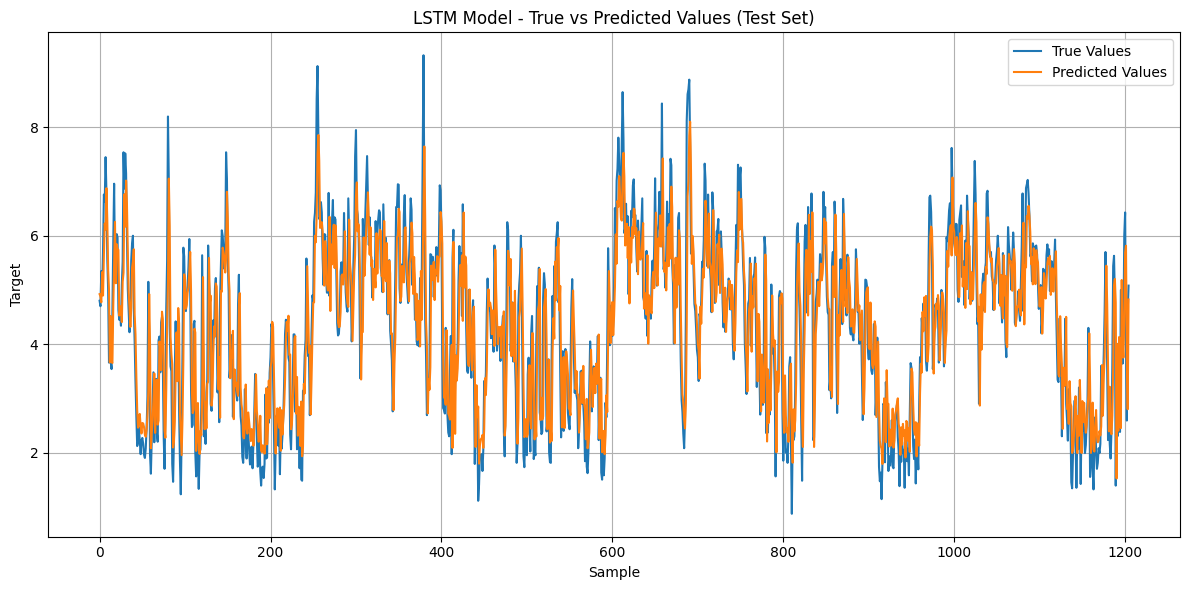

In [9]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Set random seeds for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# -----------------------------
# Data Preprocessing
# -----------------------------
# Assume X_train, X_test, y_train, y_test are already defined

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input for LSTM: (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# -----------------------------
# Define and Compile LSTM Model
# -----------------------------
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(units=1))  # Output layer for regression

lstm_model.compile(optimizer=Adam(), loss='mean_squared_error')

# -----------------------------
# Train the Model
# -----------------------------
history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

# -----------------------------
# Predictions
# -----------------------------
y_pred_train = lstm_model.predict(X_train_lstm).flatten()
y_pred_test = lstm_model.predict(X_test_lstm).flatten()

y_train_actual = y_train.to_numpy().flatten() if isinstance(y_train, pd.Series) else y_train.flatten()
y_test_actual = y_test.to_numpy().flatten() if isinstance(y_test, pd.Series) else y_test.flatten()

# -----------------------------
# Evaluation Metrics
# -----------------------------
def evaluate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, mape, r2

train_mse, train_mae, train_rmse, train_mape, train_r2 = evaluate_metrics(y_train_actual, y_pred_train)
test_mse, test_mae, test_rmse, test_mape, test_r2 = evaluate_metrics(y_test_actual, y_pred_test)

# -----------------------------
# Print Results
# -----------------------------
print(f"Training MSE:  {train_mse:.4f}, MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}, MAPE: {train_mape:.2f}%, R²: {train_r2:.4f}")
print(f"Test     MSE:  {test_mse:.4f}, MAE: {test_mae:.4f}, RMSE: {test_rmse:.4f}, MAPE: {test_mape:.2f}%, R²: {test_r2:.4f}")

# -----------------------------
# Plot True vs Predicted
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='True Values')
plt.plot(y_pred_test, label='Predicted Values')
plt.title('LSTM Model - True vs Predicted Values (Test Set)')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## LSTM - Grid Search CV

In [ ]:
! pip install scikit-learn==1.2.2
!pip install scikeras
!pip install scikeras



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.8 requires scikit-learn>=1.6, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 108.8 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [ ]:
#!pip install --upgrade scikit-learn
#!pip install scikit-learn==1.2.2
#!pip install scikeras==0.10.0


In [10]:
!pip install scikeras


  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
Using cached scikeras-0.13.0-py3-none-any.whl (26 kB)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ======== Scale your data first ========
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# ======== Reshape for LSTM (samples, timesteps=3, features=1) ========
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# ======== Define the LSTM model creation function ========
def create_model_lstm(hidden_layer_sizes=(50,), activation='relu', input_shape=(3, 1)):
    model = Sequential()
    for i, units in enumerate(hidden_layer_sizes):
        if i == 0:
            model.add(LSTM(units, activation=activation,
                           return_sequences=(len(hidden_layer_sizes) > 1),
                           input_shape=input_shape))
        elif i == len(hidden_layer_sizes) - 1:
            model.add(LSTM(units, activation=activation))
        else:
            model.add(LSTM(units, activation=activation, return_sequences=True))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# ======== Wrap model with KerasRegressor ========
keras_regressor_lstm = KerasRegressor(model=create_model_lstm, verbose=0, random_state=42)

# ======== Grid Search parameters ========
param_grid = {
    'model__hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [16, 32],
    'epochs': [100, 200],
}

# ======== Run GridSearchCV ========
grid_search_lstm = GridSearchCV(
    estimator=keras_regressor_lstm,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_percentage_error',
    verbose=2,
    n_jobs=-1,
)

grid_search_lstm.fit(X_train_reshaped, y_train_scaled)

print("Best parameters for LSTM:", grid_search_lstm.best_params_)

# ======== Get best model and predict ========
best_lstm_model = grid_search_lstm.best_estimator_

y_pred_train_scaled = best_lstm_model.predict(X_train_reshaped)
y_pred_test_scaled = best_lstm_model.predict(X_test_reshaped)

# ======== Inverse scale predictions ========
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

# ======== Evaluation function with R-squared ========
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R-squared: {r2:.4f}")

# ======== Evaluate ========
evaluate_model(y_train.values, y_pred_train, "LSTM Train-Grid")
evaluate_model(y_test.values, y_pred_test, "LSTM Test-Grid")


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Best parameters for LSTM: {'batch_size': 32, 'epochs': 100, 'model__activation': 'tanh', 'model__hidden_layer_sizes': (150, 100, 50)}

LSTM Train-Grid Evaluation:
RMSE: 0.7909
MSE: 0.6256
MAE: 0.6079
MAPE: 18.65%
R-squared: 0.7475

LSTM Test-Grid Evaluation:
RMSE: 0.8754
MSE: 0.7663
MAE: 0.6755
MAPE: 19.49%
R-squared: 0.6979


In [ ]:


# Function to evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)  # Calculate R-squared

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{model_name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")  # Print MAPE
    print(f"R-squared: {r2:.4f}")

# Evaluate the LSTM model
evaluate_model(y_train, y_pred_lstm_train_grid, "LSTM Train-Random")
evaluate_model(y_test, y_pred_lstm_test_grid, "LSTM Test-Random")

# Visualization of Actual vs Predicted Values
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot actual values for training data
plt.plot(y_train.index, y_train, label="y_train (Actual)", color="blue", linestyle="dashed", alpha=0.8)

# Plot predicted values for training data
plt.plot(y_train.index, y_pred_lstm_train_grid, label="y_train (Predicted)", color="orange", alpha=0.8)

# Plot actual values for test data
plt.plot(y_test.index, y_test, label="y_test (Actual)", color="green", linestyle="dashed", alpha=0.8)

# Plot predicted values for test data
plt.plot(y_test.index, y_pred_lstm_test_grid, label="y_test (Predicted)", color="red", alpha=0.8)

# Add labels, title, and legend
plt.title("Actual vs Predicted Values (with Date Wind Speed - Random Search LSTM)")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


## LSTM- Random Search CV

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from scipy.stats import randint, uniform

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# === Scale data first ===
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

# Reshape scaled data for LSTM: (samples, timesteps=3, features=1)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define LSTM model creator with fixed return_sequences logic
def create_model_lstm(hidden_layer_sizes=(50,), activation='relu', input_shape=(3,1)):
    model = Sequential()
    for i, units in enumerate(hidden_layer_sizes):
        if i == 0:
            # First layer, specify input shape
            model.add(LSTM(units, activation=activation, return_sequences=(len(hidden_layer_sizes) > 1), input_shape=input_shape))
        elif i == len(hidden_layer_sizes) - 1:
            # Last LSTM layer, no return_sequences
            model.add(LSTM(units, activation=activation))
        else:
            # Middle LSTM layers
            model.add(LSTM(units, activation=activation, return_sequences=True))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Wrap with scikeras KerasRegressor
keras_regressor_lstm = KerasRegressor(model=create_model_lstm, verbose=0, random_state=42)

# Hyperparameter space
param_dist = {
    'model__hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200],
}

# Randomized Search CV
random_search_lstm = RandomizedSearchCV(estimator=keras_regressor_lstm, param_distributions=param_dist,
                                        n_iter=10, cv=3, scoring='neg_mean_absolute_percentage_error',
                                        verbose=2, n_jobs=-1, random_state=42)

random_search_lstm.fit(X_train_reshaped, y_train_scaled)

# Best params
best_model_params_lstm = random_search_lstm.best_params_
print("Best parameters for LSTM:", best_model_params_lstm)

# Best model refit
best_lstm_model = random_search_lstm.best_estimator_

# Predict scaled outputs
y_pred_train_scaled = best_lstm_model.predict(X_train_reshaped)
y_pred_test_scaled = best_lstm_model.predict(X_test_reshaped)

# Inverse scale predictions
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()
from sklearn.metrics import r2_score

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R-squared: {r2:.4f}")


# Evaluate
evaluate_model(y_train.values, y_pred_train, "LSTM Train-Random")
evaluate_model(y_test.values, y_pred_test, "LSTM Test-Random")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Best parameters for LSTM: {'model__hidden_layer_sizes': (50,), 'model__activation': 'tanh', 'epochs': 50, 'batch_size': 32}

LSTM Train-Random Evaluation:
RMSE: 0.7979
MSE: 0.6367
MAE: 0.6148
MAPE: 18.91%
R-squared: 0.7430

LSTM Test-Random Evaluation:
RMSE: 0.8832
MSE: 0.7801
MAE: 0.6838
MAPE: 19.89%
R-squared: 0.6924



LSTM Train-Random Evaluation:
RMSE: 0.7979
MSE: 0.6367
MAE: 0.6148
MAPE: 18.91%
R-squared: 0.7430

LSTM Test-Random Evaluation:
RMSE: 0.8832
MSE: 0.7801
MAE: 0.6838
MAPE: 19.89%
R-squared: 0.6924


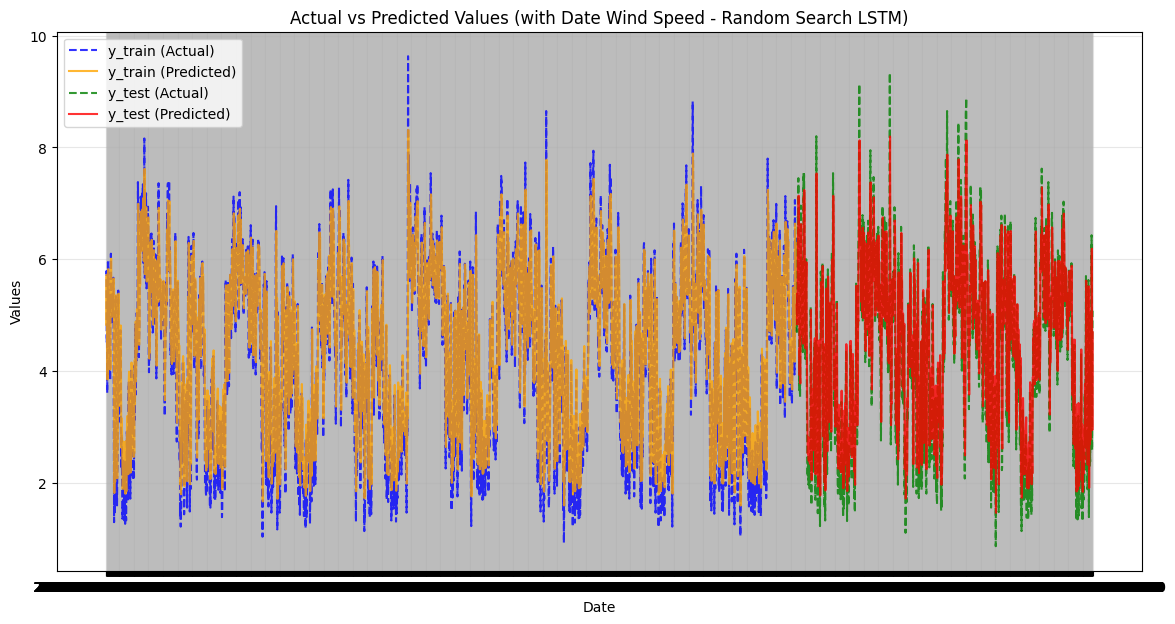

In [17]:


# Function to evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)  # Calculate R-squared

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{model_name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")  # Print MAPE
    print(f"R-squared: {r2:.4f}")

# Evaluate the LSTM model
evaluate_model(y_train, y_pred_train, "LSTM Train-Random")
evaluate_model(y_test, y_pred_test, "LSTM Test-Random")

# Visualization of Actual vs Predicted Values
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot actual values for training data
plt.plot(y_train.index, y_train, label="y_train (Actual)", color="blue", linestyle="dashed", alpha=0.8)

# Plot predicted values for training data
plt.plot(y_train.index, y_pred_train, label="y_train (Predicted)", color="orange", alpha=0.8)

# Plot actual values for test data
plt.plot(y_test.index, y_test, label="y_test (Actual)", color="green", linestyle="dashed", alpha=0.8)

# Plot predicted values for test data
plt.plot(y_test.index, y_pred_test, label="y_test (Predicted)", color="red", alpha=0.8)

# Add labels, title, and legend
plt.title("Actual vs Predicted Values (with Date Wind Speed - Random Search LSTM)")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


## lstm - Optuna

In [18]:
! pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 13.2 MB/s eta 0:00:00


[I 2025-07-07 08:01:04,173] A new study created in memory with name: no-name-da5a8bb9-624e-4c96-9a31-0b4e308475ce
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:01:16,089] Trial 0 finished with value: 0.010470310526241382 and parameters: {'n_units': 81, 'dropout_rate': 0.4802857225639665, 'learning_rate': 0.0029106359131330704, 'batch_size': 83, 'n_epochs': 24}. Best is trial 0 with value: 0.010470310526241382.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-07-07 08:01:38,217] Trial 1 finished with value: 0.009938140005468008 and parameters: {'n_units': 39, 'dropout_rate': 0.12323344486727979, 'learning_rate': 0.005399484409787433, 'batch_size': 83, 'n_epochs': 74}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:01:49,387] Trial 2 finished with value: 0.01112090455648302 and parameters: {'n_units': 13, 'dropout_rate': 0.4879639408647978, 'learning_rate': 0.004622589001020831, 'batch_size': 39, 'n_epochs': 26}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:02:02,543] Trial 3 finished with value: 0.01052750546396249 and parameters: {'n_units': 45, 'dropout_rate': 0.2216968971838151, 'learning_rate': 0.0011207606211860567, 'batch_size': 64, 'n_epochs': 36}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:02:38,159] Trial 4 finished with value: 0.010409568300070208 and parameters: {'n_units': 126, 'dropout_rate': 0.15579754426081674, 'learning_rate': 0.0003839629299804173, 'batch_size': 57, 'n_epochs': 51}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


[I 2025-07-07 08:02:49,288] Trial 5 finished with value: 0.011217838966837987 and parameters: {'n_units': 159, 'dropout_rate': 0.1798695128633439, 'learning_rate': 0.0010677482709481358, 'batch_size': 82, 'n_epochs': 14}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:03:22,403] Trial 6 finished with value: 0.01140697384889989 and parameters: {'n_units': 126, 'dropout_rate': 0.16820964947491662, 'learning_rate': 0.00013492834268013249, 'batch_size': 123, 'n_epochs': 97}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:03:53,736] Trial 7 finished with value: 0.011497407552830019 and parameters: {'n_units': 164, 'dropout_rate': 0.2218455076693483, 'learning_rate': 0.0001567993391672301, 'batch_size': 93, 'n_epochs': 50}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:04:00,921] Trial 8 finished with value: 0.015550738702244176 and parameters: {'n_units': 33, 'dropout_rate': 0.29807076404450805, 'learning_rate': 0.00011715937392307068, 'batch_size': 118, 'n_epochs': 33}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2025-07-07 08:04:19,516] Trial 9 finished with value: 0.010446583909396954 and parameters: {'n_units': 136, 'dropout_rate': 0.2246844304357644, 'learning_rate': 0.001096821720752952, 'batch_size': 77, 'n_epochs': 26}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:05:27,542] Trial 10 finished with value: 0.01057581755243946 and parameters: {'n_units': 78, 'dropout_rate': 0.10239887318232685, 'learning_rate': 0.008691089486124973, 'batch_size': 18, 'n_epochs': 85}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


[I 2025-07-07 08:05:56,908] Trial 11 finished with value: 0.010279170789605241 and parameters: {'n_units': 93, 'dropout_rate': 0.10384703647585203, 'learning_rate': 0.00034170489746394937, 'batch_size': 53, 'n_epochs': 69}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:06:23,841] Trial 12 finished with value: 0.010374128555787815 and parameters: {'n_units': 71, 'dropout_rate': 0.10347840451904067, 'learning_rate': 0.00039686978786113505, 'batch_size': 47, 'n_epochs': 72}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-07-07 08:06:48,739] Trial 13 finished with value: 0.010892009340431061 and parameters: {'n_units': 100, 'dropout_rate': 0.37595616933987674, 'learning_rate': 0.0004217138485758365, 'batch_size': 104, 'n_epochs': 68}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:07:33,947] Trial 14 finished with value: 0.010079167282722101 and parameters: {'n_units': 53, 'dropout_rate': 0.31111155721201283, 'learning_rate': 0.0026178731910182058, 'batch_size': 25, 'n_epochs': 67}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-07-07 08:08:22,055] Trial 15 finished with value: 0.010054782837932893 and parameters: {'n_units': 52, 'dropout_rate': 0.3257880836428049, 'learning_rate': 0.0026543342098933158, 'batch_size': 24, 'n_epochs': 81}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2025-07-07 08:09:19,157] Trial 16 finished with value: 0.009988316732526693 and parameters: {'n_units': 200, 'dropout_rate': 0.38258954986354593, 'learning_rate': 0.006228631613505084, 'batch_size': 99, 'n_epochs': 86}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-07-07 08:10:21,802] Trial 17 finished with value: 0.010074520471031108 and parameters: {'n_units': 200, 'dropout_rate': 0.4317642306904218, 'learning_rate': 0.008524636948952195, 'batch_size': 104, 'n_epochs': 100}. Best is trial 1 with value: 0.009938140005468008.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:11:15,415] Trial 18 finished with value: 0.009914762957794877 and parameters: {'n_units': 200, 'dropout_rate': 0.39208115398038323, 'learning_rate': 0.005075104730476923, 'batch_size': 96, 'n_epochs': 84}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2025-07-07 08:11:50,266] Trial 19 finished with value: 0.009999338391303576 and parameters: {'n_units': 173, 'dropout_rate': 0.27598464809819784, 'learning_rate': 0.003884102911126366, 'batch_size': 114, 'n_epochs': 58}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:12:39,304] Trial 20 finished with value: 0.010020697700991068 and parameters: {'n_units': 145, 'dropout_rate': 0.37099826819571763, 'learning_rate': 0.0016539406162826053, 'batch_size': 91, 'n_epochs': 78}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:13:31,087] Trial 21 finished with value: 0.009922467255044354 and parameters: {'n_units': 183, 'dropout_rate': 0.40898106269107876, 'learning_rate': 0.006713949633208398, 'batch_size': 102, 'n_epochs': 90}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-07-07 08:14:24,342] Trial 22 finished with value: 0.009936644775272048 and parameters: {'n_units': 181, 'dropout_rate': 0.43048785520706856, 'learning_rate': 0.005977319569171368, 'batch_size': 107, 'n_epochs': 91}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2025-07-07 08:15:18,166] Trial 23 finished with value: 0.010022900298334515 and parameters: {'n_units': 178, 'dropout_rate': 0.42963324042767864, 'learning_rate': 0.0018522430680375556, 'batch_size': 128, 'n_epochs': 89}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-07-07 08:16:14,139] Trial 24 finished with value: 0.009957033442667847 and parameters: {'n_units': 184, 'dropout_rate': 0.43281904911941044, 'learning_rate': 0.009953432140886113, 'batch_size': 114, 'n_epochs': 92}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2025-07-07 08:17:08,736] Trial 25 finished with value: 0.010265124980247523 and parameters: {'n_units': 190, 'dropout_rate': 0.4557797847780625, 'learning_rate': 0.006476685153906254, 'batch_size': 108, 'n_epochs': 94}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-07-07 08:17:47,165] Trial 26 finished with value: 0.009955497970377255 and parameters: {'n_units': 155, 'dropout_rate': 0.4043156078796571, 'learning_rate': 0.0036212324598248837, 'batch_size': 94, 'n_epochs': 63}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:18:38,082] Trial 27 finished with value: 0.009938347789866483 and parameters: {'n_units': 176, 'dropout_rate': 0.3474840570033684, 'learning_rate': 0.001841877681762922, 'batch_size': 70, 'n_epochs': 80}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


[I 2025-07-07 08:19:43,506] Trial 28 finished with value: 0.010070567581883556 and parameters: {'n_units': 190, 'dropout_rate': 0.4070779867147654, 'learning_rate': 0.000611084265761882, 'batch_size': 89, 'n_epochs': 100}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:20:34,715] Trial 29 finished with value: 0.009939747891577422 and parameters: {'n_units': 147, 'dropout_rate': 0.4633174040962531, 'learning_rate': 0.0031644838664044122, 'batch_size': 111, 'n_epochs': 89}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-07-07 08:21:19,931] Trial 30 finished with value: 0.009947788036971477 and parameters: {'n_units': 167, 'dropout_rate': 0.34434111649116506, 'learning_rate': 0.006597816407588061, 'batch_size': 101, 'n_epochs': 77}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:21:56,373] Trial 31 finished with value: 0.00992953804465037 and parameters: {'n_units': 120, 'dropout_rate': 0.26313313239931735, 'learning_rate': 0.004951273951876388, 'batch_size': 82, 'n_epochs': 75}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:22:34,031] Trial 32 finished with value: 0.009934061271883387 and parameters: {'n_units': 125, 'dropout_rate': 0.26109344277118124, 'learning_rate': 0.0048616432850368, 'batch_size': 84, 'n_epochs': 84}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-07-07 08:23:26,170] Trial 33 finished with value: 0.010031530214257326 and parameters: {'n_units': 128, 'dropout_rate': 0.25524741370071974, 'learning_rate': 0.004787411419974988, 'batch_size': 72, 'n_epochs': 84}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:23:58,410] Trial 34 finished with value: 0.009918522113427801 and parameters: {'n_units': 109, 'dropout_rate': 0.2524046913996764, 'learning_rate': 0.004630124450384084, 'batch_size': 84, 'n_epochs': 75}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2025-07-07 08:24:32,932] Trial 35 finished with value: 0.009945694988868064 and parameters: {'n_units': 116, 'dropout_rate': 0.2848971170445036, 'learning_rate': 0.002321302280467408, 'batch_size': 83, 'n_epochs': 74}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:25:05,355] Trial 36 finished with value: 0.009937021811103243 and parameters: {'n_units': 114, 'dropout_rate': 0.2381316287285614, 'learning_rate': 0.003997929007990884, 'batch_size': 77, 'n_epochs': 61}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:25:34,053] Trial 37 finished with value: 0.00998538579483817 and parameters: {'n_units': 110, 'dropout_rate': 0.20452229171405764, 'learning_rate': 0.007624974477442011, 'batch_size': 63, 'n_epochs': 47}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:25:48,568] Trial 38 finished with value: 0.011436684449709479 and parameters: {'n_units': 10, 'dropout_rate': 0.19092550103283268, 'learning_rate': 0.0007975730001042815, 'batch_size': 96, 'n_epochs': 75}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[I 2025-07-07 08:26:09,048] Trial 39 finished with value: 0.009936046548104932 and parameters: {'n_units': 92, 'dropout_rate': 0.3270137314597264, 'learning_rate': 0.004818843840697122, 'batch_size': 87, 'n_epochs': 55}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-07-07 08:26:24,561] Trial 40 finished with value: 0.010436277783360141 and parameters: {'n_units': 66, 'dropout_rate': 0.49059872995572285, 'learning_rate': 0.001384201810675307, 'batch_size': 77, 'n_epochs': 44}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


[I 2025-07-07 08:27:10,144] Trial 41 finished with value: 0.009927003775294563 and parameters: {'n_units': 133, 'dropout_rate': 0.268986530978331, 'learning_rate': 0.004966476284808712, 'batch_size': 84, 'n_epochs': 82}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2025-07-07 08:27:59,784] Trial 42 finished with value: 0.009973106273846207 and parameters: {'n_units': 139, 'dropout_rate': 0.24196979528035528, 'learning_rate': 0.003754872920734232, 'batch_size': 68, 'n_epochs': 81}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:28:34,337] Trial 43 finished with value: 0.00992253135400422 and parameters: {'n_units': 101, 'dropout_rate': 0.14939153479415898, 'learning_rate': 0.0031782627538753916, 'batch_size': 80, 'n_epochs': 94}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:29:08,830] Trial 44 finished with value: 0.009981821494578217 and parameters: {'n_units': 100, 'dropout_rate': 0.14038037342133233, 'learning_rate': 0.007362496846178456, 'batch_size': 97, 'n_epochs': 97}. Best is trial 18 with value: 0.009914762957794877.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:29:43,280] Trial 45 finished with value: 0.009897612821912196 and parameters: {'n_units': 85, 'dropout_rate': 0.13196015031653713, 'learning_rate': 0.0030383111786078994, 'batch_size': 77, 'n_epochs': 94}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-07-07 08:30:25,303] Trial 46 finished with value: 0.009930462175567112 and parameters: {'n_units': 85, 'dropout_rate': 0.1481231452530746, 'learning_rate': 0.002248320017502834, 'batch_size': 60, 'n_epochs': 96}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:30:55,260] Trial 47 finished with value: 0.00991722461535301 and parameters: {'n_units': 67, 'dropout_rate': 0.12854978059791772, 'learning_rate': 0.0031303280643549094, 'batch_size': 76, 'n_epochs': 88}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:31:21,752] Trial 48 finished with value: 0.01036329125897512 and parameters: {'n_units': 38, 'dropout_rate': 0.1275260466718939, 'learning_rate': 0.0014318308610529098, 'batch_size': 72, 'n_epochs': 87}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:31:46,257] Trial 49 finished with value: 0.010269727192770957 and parameters: {'n_units': 21, 'dropout_rate': 0.17022491940659198, 'learning_rate': 0.002864371776093208, 'batch_size': 48, 'n_epochs': 70}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:32:15,851] Trial 50 finished with value: 0.010260507908235699 and parameters: {'n_units': 66, 'dropout_rate': 0.1998427311760005, 'learning_rate': 0.009533930504720275, 'batch_size': 66, 'n_epochs': 90}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:32:48,634] Trial 51 finished with value: 0.010030074670690734 and parameters: {'n_units': 77, 'dropout_rate': 0.12047010356739758, 'learning_rate': 0.0032385988759299493, 'batch_size': 78, 'n_epochs': 95}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-07-07 08:32:54,294] Trial 52 finished with value: 0.011053388535078468 and parameters: {'n_units': 52, 'dropout_rate': 0.16057483533110625, 'learning_rate': 0.002370123194876596, 'batch_size': 91, 'n_epochs': 14}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:33:26,969] Trial 53 finished with value: 0.009979561530246522 and parameters: {'n_units': 94, 'dropout_rate': 0.12966993206147076, 'learning_rate': 0.004148456302675036, 'batch_size': 78, 'n_epochs': 93}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2025-07-07 08:33:57,672] Trial 54 finished with value: 0.010696536155621614 and parameters: {'n_units': 85, 'dropout_rate': 0.16947512018843333, 'learning_rate': 0.00024238310721636186, 'batch_size': 87, 'n_epochs': 86}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:34:29,873] Trial 55 finished with value: 0.010027360329959841 and parameters: {'n_units': 59, 'dropout_rate': 0.11593271455363953, 'learning_rate': 0.005681888806821256, 'batch_size': 55, 'n_epochs': 99}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:34:59,146] Trial 56 finished with value: 0.009915625807434677 and parameters: {'n_units': 74, 'dropout_rate': 0.14226504016229813, 'learning_rate': 0.003221050974166282, 'batch_size': 99, 'n_epochs': 88}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:35:28,956] Trial 57 finished with value: 0.009907473233072141 and parameters: {'n_units': 71, 'dropout_rate': 0.3980541823494624, 'learning_rate': 0.00699935534640665, 'batch_size': 99, 'n_epochs': 88}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:35:55,368] Trial 58 finished with value: 0.010049126543406629 and parameters: {'n_units': 71, 'dropout_rate': 0.18137770361926753, 'learning_rate': 0.0021482979150705553, 'batch_size': 120, 'n_epochs': 78}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:36:21,916] Trial 59 finished with value: 0.00992453337000945 and parameters: {'n_units': 59, 'dropout_rate': 0.38173487726509525, 'learning_rate': 0.004119488939127194, 'batch_size': 95, 'n_epochs': 87}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:36:42,230] Trial 60 finished with value: 0.009983834874309119 and parameters: {'n_units': 43, 'dropout_rate': 0.2987073295610191, 'learning_rate': 0.008199505021957645, 'batch_size': 106, 'n_epochs': 65}. Best is trial 45 with value: 0.009897612821912196.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-07-07 08:37:14,051] Trial 61 finished with value: 0.009865775343145125 and parameters: {'n_units': 80, 'dropout_rate': 0.35145105284271605, 'learning_rate': 0.006822079693516292, 'batch_size': 101, 'n_epochs': 91}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:37:43,668] Trial 62 finished with value: 0.009909705650801166 and parameters: {'n_units': 75, 'dropout_rate': 0.3645483145605855, 'learning_rate': 0.005569692296234293, 'batch_size': 100, 'n_epochs': 83}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


[I 2025-07-07 08:38:13,121] Trial 63 finished with value: 0.00987165831070689 and parameters: {'n_units': 78, 'dropout_rate': 0.36685711185757003, 'learning_rate': 0.005665139302771597, 'batch_size': 99, 'n_epochs': 84}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2025-07-07 08:38:40,949] Trial 64 finished with value: 0.009883163393944008 and parameters: {'n_units': 80, 'dropout_rate': 0.3586907400209117, 'learning_rate': 0.008566711540677677, 'batch_size': 115, 'n_epochs': 83}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:39:10,290] Trial 65 finished with value: 0.009880651732711878 and parameters: {'n_units': 82, 'dropout_rate': 0.3633635374352166, 'learning_rate': 0.005709794059615058, 'batch_size': 111, 'n_epochs': 83}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:39:38,380] Trial 66 finished with value: 0.009958452094879743 and parameters: {'n_units': 83, 'dropout_rate': 0.3600994331607876, 'learning_rate': 0.007161871009289333, 'batch_size': 114, 'n_epochs': 82}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:40:10,036] Trial 67 finished with value: 0.00991936083911328 and parameters: {'n_units': 89, 'dropout_rate': 0.3612654558833949, 'learning_rate': 0.008775877511398137, 'batch_size': 124, 'n_epochs': 92}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:40:35,345] Trial 68 finished with value: 0.009945003487983276 and parameters: {'n_units': 80, 'dropout_rate': 0.3197630162726879, 'learning_rate': 0.005815777902865929, 'batch_size': 110, 'n_epochs': 72}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:41:00,813] Trial 69 finished with value: 0.00998079128213316 and parameters: {'n_units': 58, 'dropout_rate': 0.3369509144008812, 'learning_rate': 0.005930187039783862, 'batch_size': 121, 'n_epochs': 79}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:41:30,177] Trial 70 finished with value: 0.009968401272609591 and parameters: {'n_units': 97, 'dropout_rate': 0.39544958879290537, 'learning_rate': 0.00977627532474647, 'batch_size': 103, 'n_epochs': 83}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:42:00,045] Trial 71 finished with value: 0.009940554197389507 and parameters: {'n_units': 89, 'dropout_rate': 0.3667196147868757, 'learning_rate': 0.007849186534843376, 'batch_size': 111, 'n_epochs': 85}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:42:30,953] Trial 72 finished with value: 0.010244810409596579 and parameters: {'n_units': 72, 'dropout_rate': 0.39271892040103784, 'learning_rate': 0.006891403973795836, 'batch_size': 117, 'n_epochs': 92}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


[I 2025-07-07 08:43:00,518] Trial 73 finished with value: 0.0099137104111744 and parameters: {'n_units': 82, 'dropout_rate': 0.41930685104352416, 'learning_rate': 0.006157820485414187, 'batch_size': 105, 'n_epochs': 78}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:43:27,177] Trial 74 finished with value: 0.00992571548500013 and parameters: {'n_units': 77, 'dropout_rate': 0.3514377391804774, 'learning_rate': 0.00565015491351176, 'batch_size': 105, 'n_epochs': 78}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:43:52,573] Trial 75 finished with value: 0.00990270465025127 and parameters: {'n_units': 104, 'dropout_rate': 0.418129684908226, 'learning_rate': 0.008619878978352126, 'batch_size': 100, 'n_epochs': 71}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:44:27,803] Trial 76 finished with value: 0.009877392726553452 and parameters: {'n_units': 105, 'dropout_rate': 0.4457731385260795, 'learning_rate': 0.008735488551060808, 'batch_size': 101, 'n_epochs': 98}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:45:01,040] Trial 77 finished with value: 0.009893997202567334 and parameters: {'n_units': 105, 'dropout_rate': 0.4361777582780173, 'learning_rate': 0.008647286242390624, 'batch_size': 126, 'n_epochs': 97}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:45:34,573] Trial 78 finished with value: 0.00992707593695251 and parameters: {'n_units': 109, 'dropout_rate': 0.455379542633942, 'learning_rate': 0.008894708810335746, 'batch_size': 127, 'n_epochs': 97}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:46:09,257] Trial 79 finished with value: 0.009932579041201994 and parameters: {'n_units': 100, 'dropout_rate': 0.44513901552703283, 'learning_rate': 0.008130563417142737, 'batch_size': 114, 'n_epochs': 100}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:46:46,162] Trial 80 finished with value: 0.010133460729397666 and parameters: {'n_units': 105, 'dropout_rate': 0.47368529837163925, 'learning_rate': 0.009134585445493839, 'batch_size': 117, 'n_epochs': 98}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2025-07-07 08:47:22,562] Trial 81 finished with value: 0.010059728675426004 and parameters: {'n_units': 119, 'dropout_rate': 0.41596700850790763, 'learning_rate': 0.006876891306604752, 'batch_size': 108, 'n_epochs': 95}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


[I 2025-07-07 08:47:54,344] Trial 82 finished with value: 0.00990167711522989 and parameters: {'n_units': 104, 'dropout_rate': 0.376775857043576, 'learning_rate': 0.007800970959663748, 'batch_size': 124, 'n_epochs': 91}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:48:26,992] Trial 83 finished with value: 0.00990699156583061 and parameters: {'n_units': 104, 'dropout_rate': 0.38000397328590624, 'learning_rate': 0.009913851926739775, 'batch_size': 124, 'n_epochs': 93}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:48:59,190] Trial 84 finished with value: 0.009898997764036582 and parameters: {'n_units': 94, 'dropout_rate': 0.44023685641721155, 'learning_rate': 0.00790591038533887, 'batch_size': 119, 'n_epochs': 91}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:49:29,053] Trial 85 finished with value: 0.009880460814242651 and parameters: {'n_units': 89, 'dropout_rate': 0.4420250274341432, 'learning_rate': 0.00801510251532525, 'batch_size': 126, 'n_epochs': 91}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:50:01,671] Trial 86 finished with value: 0.009922759857796337 and parameters: {'n_units': 88, 'dropout_rate': 0.4742864837259016, 'learning_rate': 0.00639005420927627, 'batch_size': 128, 'n_epochs': 96}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:50:31,359] Trial 87 finished with value: 0.00991430328305722 and parameters: {'n_units': 96, 'dropout_rate': 0.44321508620355976, 'learning_rate': 0.005418121124805626, 'batch_size': 119, 'n_epochs': 90}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:51:04,532] Trial 88 finished with value: 0.009925939834548545 and parameters: {'n_units': 92, 'dropout_rate': 0.30997353888700285, 'learning_rate': 0.0075398832310609966, 'batch_size': 116, 'n_epochs': 98}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2025-07-07 08:51:39,232] Trial 89 finished with value: 0.01008888809304975 and parameters: {'n_units': 112, 'dropout_rate': 0.49875410160516426, 'learning_rate': 0.004387165942642026, 'batch_size': 122, 'n_epochs': 95}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:52:06,906] Trial 90 finished with value: 0.010466678449712614 and parameters: {'n_units': 63, 'dropout_rate': 0.4394833183616535, 'learning_rate': 0.0009327893590138686, 'batch_size': 112, 'n_epochs': 85}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:52:38,985] Trial 91 finished with value: 0.00989487901395852 and parameters: {'n_units': 85, 'dropout_rate': 0.3376510406232098, 'learning_rate': 0.008051859993702847, 'batch_size': 125, 'n_epochs': 91}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:53:08,597] Trial 92 finished with value: 0.009904450238557419 and parameters: {'n_units': 81, 'dropout_rate': 0.46114722744034164, 'learning_rate': 0.006530997296345286, 'batch_size': 126, 'n_epochs': 89}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:53:40,412] Trial 93 finished with value: 0.009910901252551974 and parameters: {'n_units': 88, 'dropout_rate': 0.3359597470129065, 'learning_rate': 0.00831518458794508, 'batch_size': 119, 'n_epochs': 93}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:53:54,849] Trial 94 finished with value: 0.010085585249040364 and parameters: {'n_units': 95, 'dropout_rate': 0.2836398913283094, 'learning_rate': 0.005047709359289553, 'batch_size': 121, 'n_epochs': 38}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:54:28,943] Trial 95 finished with value: 0.009913502175066124 and parameters: {'n_units': 84, 'dropout_rate': 0.3448362943808172, 'learning_rate': 0.009906280465220298, 'batch_size': 126, 'n_epochs': 100}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[I 2025-07-07 08:55:18,586] Trial 96 finished with value: 0.010109568632824832 and parameters: {'n_units': 78, 'dropout_rate': 0.4255182427765286, 'learning_rate': 0.007649963496715307, 'batch_size': 37, 'n_epochs': 91}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:55:50,423] Trial 97 finished with value: 0.009926431704372464 and parameters: {'n_units': 98, 'dropout_rate': 0.4505655216811966, 'learning_rate': 0.00873494448562023, 'batch_size': 115, 'n_epochs': 94}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-07-07 08:56:22,352] Trial 98 finished with value: 0.009907645749220156 and parameters: {'n_units': 92, 'dropout_rate': 0.31796191089852793, 'learning_rate': 0.006249347011593307, 'batch_size': 110, 'n_epochs': 86}. Best is trial 61 with value: 0.009865775343145125.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[I 2025-07-07 08:56:56,564] Trial 99 finished with value: 0.009932910585190453 and parameters: {'n_units': 68, 'dropout_rate': 0.4049792990885775, 'learning_rate': 0.004441615826569496, 'batch_size': 93, 'n_epochs': 97}. Best is trial 61 with value: 0.009865775343145125.


Best Hyperparameters for LSTM: {'n_units': 80, 'dropout_rate': 0.35145105284271605, 'learning_rate': 0.006822079693516292, 'batch_size': 101, 'n_epochs': 91}
Epoch 1/91


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0550
Epoch 2/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126
Epoch 3/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118
Epoch 4/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109
Epoch 5/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109
Epoch 6/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104
Epoch 7/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103
Epoch 8/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103
Epoch 9/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103
Epoch 10/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100
Epoch 11/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104
Epoch 12/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101
Epoch 13/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095
Epoch 14/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094
Epoch 15/91
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091
Epoch 16/91
28/28 ━━━━━━━━━━━━

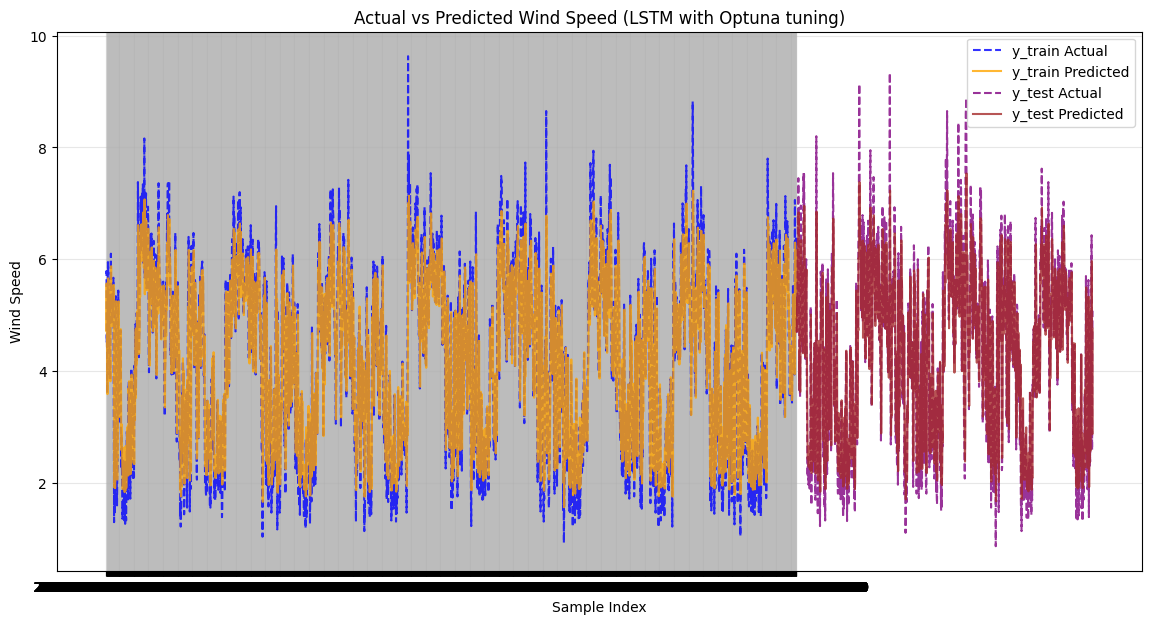

In [23]:
# === Prepare input and output for model training ===
X = df_lagged.drop(columns=["WS10M"])
y = df_lagged['WS10M']

X_train = train.drop(columns=['WS10M'])
y_train = train['WS10M']

X_test = test.drop(columns=['WS10M'])
y_test = test['WS10M']

# === Imports ===
import optuna
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# === Set seeds for reproducibility ===
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# === Scaling ===
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# === Reshape for LSTM input: (samples, timesteps, features) ===
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 3, 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 3, 1))

# === Optuna Objective ===
def objective(trial):
    n_units = trial.suggest_int("n_units", 10, 200)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_int("batch_size", 16, 128)
    n_epochs = trial.suggest_int("n_epochs", 10, 100)

    model = Sequential([
        LSTM(n_units, activation="tanh", input_shape=(3, 1)),
        Dropout(dropout_rate),
        Dense(1)
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="mean_squared_error")

    model.fit(
        X_train_scaled, y_train_scaled,
        epochs=n_epochs,
        batch_size=batch_size,
        verbose=0
    )

    test_pred_scaled = model.predict(X_test_scaled).flatten()
    test_mse = mean_squared_error(y_test_scaled, test_pred_scaled)
    return test_mse

# === Run Optuna ===
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100)

print("Best Hyperparameters for LSTM:", study.best_trial.params)
best_params = study.best_trial.params

# === Final Model Training ===
final_model = Sequential([
    LSTM(best_params["n_units"], activation="tanh", input_shape=(3, 1)),
    Dropout(best_params["dropout_rate"]),
    Dense(1)
])

optimizer = Adam(learning_rate=best_params["learning_rate"])
final_model.compile(optimizer=optimizer, loss="mean_squared_error")

final_model.fit(
    X_train_scaled, y_train_scaled,
    epochs=best_params["n_epochs"],
    batch_size=best_params["batch_size"],
    verbose=1
)

# === Predictions and Inverse Scaling ===
y_pred_train_scaled = final_model.predict(X_train_scaled).flatten()
y_pred_test_scaled = final_model.predict(X_test_scaled).flatten()

y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

# === Evaluation Function ===
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

# === Evaluate Train and Test ===
evaluate_model(y_train, y_pred_train, "LSTM - Train")
evaluate_model(y_test, y_pred_test, "LSTM - Test")

# === Plot actual vs predicted ===
plt.figure(figsize=(14, 7))
plt.plot(y_train, label="y_train Actual", color="blue", linestyle="dashed", alpha=0.8)
plt.plot(y_pred_train, label="y_train Predicted", color="orange", alpha=0.8)
plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_test, label="y_test Actual", color="purple", linestyle="dashed", alpha=0.8)
plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_pred_test, label="y_test Predicted", color="brown", alpha=0.8)

plt.title("Actual vs Predicted Wind Speed (LSTM with Optuna tuning)")
plt.xlabel("Sample Index")
plt.ylabel("Wind Speed")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [24]:
# === Predictions and Inverse Scaling ===
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

# === Evaluation Function with All Metrics ===
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Evaluation:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R-squared: {r2:.4f}")

# === Evaluate Train and Test ===
evaluate_model(y_train, y_pred_train, "LSTM - Train")
evaluate_model(y_test, y_pred_test, "LSTM - Test")



LSTM - Train Evaluation:
MSE: 0.6015
RMSE: 0.7756
MAE: 0.5961
MAPE: 17.65%
R-squared: 0.7572

LSTM - Test Evaluation:
MSE: 0.7492
RMSE: 0.8656
MAE: 0.6659
MAPE: 18.59%
R-squared: 0.7046


## Evaluation